# Resnet实现

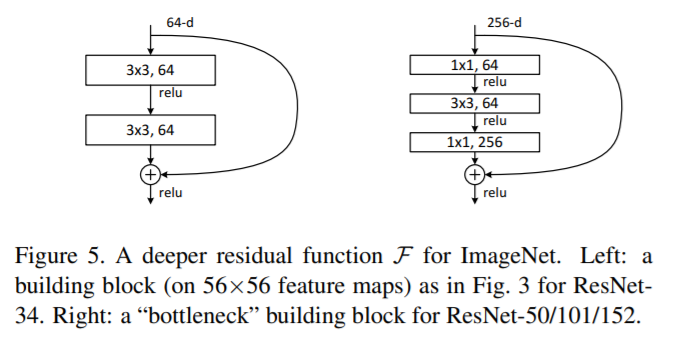

In [36]:
import torch
from torch import nn
from torch.nn import functional as F

class Basic_conv(nn.Module):
  def __init__(self,in_channels, out_channels,stride=1):
    super().__init__()
    self.conv = nn.Conv2d(in_channels, out_channels, 3, stride,padding=1)
    self.batch_norm = nn.BatchNorm2d(out_channels)
  
  def forward(self,X):
    X = self.conv(X)
    X = self.batch_norm(X)
    return X

class Build_block(nn.Module):
  def __init__(self,in_channels,out_channels,downsample=False):
    super().__init__()
    self.preprocess = nn.Sequential()
    if downsample: # 如果需要做下采样，说明通道和分辨率都需要改变
      self.conv1 = Basic_conv(in_channels,out_channels,stride = 2)
      conv3 = Basic_conv(in_channels,out_channels,stride = 2)
      self.preprocess.add_module('1x1conv',conv3) 
    else:
      self.conv1 = Basic_conv(in_channels,out_channels,stride = 1)
      
    self.conv2 = Basic_conv(out_channels,out_channels,stride = 1)
    self.relu = nn.ReLU()

  def forward(self,X):
    Y = self.conv1(X)
    Y = self.relu(Y)
    Y = self.conv2(Y)
    print(X.shape,'\t',Y.shape)
    Y += self.preprocess(X)
    return Y

In [64]:
class ResNet(nn.Module):

  build_channels = ((64,64),(64,128),(128,256),(256,512))
  # bottel_channels = (())
  def __init__(self,num_blocks,classes):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=0)
    self.batchnorm = nn.BatchNorm2d(64)
    maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
    self.conv2 = nn.Sequential(maxpool,*self.seuqence_blocks(num_blocks[0],classes,64,64,downsamples=False))
    self.conv3 = nn.Sequential(*self.seuqence_blocks(num_blocks[1],classes,64,128,downsamples=True))
    self.conv4 = nn.Sequential(*self.seuqence_blocks(num_blocks[2],classes,128,256,downsamples=True))
    self.conv5 = nn.Sequential(*self.seuqence_blocks(num_blocks[3],classes,256,512,downsamples=True))
    self.globalPool = nn.AdaptiveAvgPool2d(1)
    self.flatten = nn.Flatten()
    self.linear = nn.Linear(512,10)
    self.softmax = nn.Softmax(dim=1)

  def seuqence_blocks(self,num_blocks,classes,in_channels,out_channels,downsamples):
    layers = nn.Sequential()
    for i in range(num_blocks):
      if i==0 and downsamples:
        layers.add_module(str(i),classes(in_channels,out_channels,downsample=True))
      else:
        layers.add_module(str(i),classes(out_channels,out_channels,downsample=False))
    return layers

  def forward(self,X):
    X = self.conv1(X)
    X = self.batchnorm(X)
    X = self.conv2(X)
    X = self.conv3(X)
    X = self.conv4(X)
    X = self.conv5(X)
    X = self.globalPool(X)
    print(X.shape)
    X = self.flatten(X)
    print(X.shape)
    X = self.linear(X)
    print(X.shape)
    X = self.softmax(X)
    return X

In [65]:
class Bottleneck_block(nn.Module):
  pass

In [74]:
X = torch.randn((1,3,224,224))
net = ResNet([3,4,6,3],Build_block)
net(X)

torch.Size([1, 64, 54, 54]) 	 torch.Size([1, 64, 54, 54])
torch.Size([1, 64, 54, 54]) 	 torch.Size([1, 64, 54, 54])
torch.Size([1, 64, 54, 54]) 	 torch.Size([1, 64, 54, 54])
torch.Size([1, 64, 54, 54]) 	 torch.Size([1, 128, 27, 27])
torch.Size([1, 128, 27, 27]) 	 torch.Size([1, 128, 27, 27])
torch.Size([1, 128, 27, 27]) 	 torch.Size([1, 128, 27, 27])
torch.Size([1, 128, 27, 27]) 	 torch.Size([1, 128, 27, 27])
torch.Size([1, 128, 27, 27]) 	 torch.Size([1, 256, 14, 14])
torch.Size([1, 256, 14, 14]) 	 torch.Size([1, 256, 14, 14])
torch.Size([1, 256, 14, 14]) 	 torch.Size([1, 256, 14, 14])
torch.Size([1, 256, 14, 14]) 	 torch.Size([1, 256, 14, 14])
torch.Size([1, 256, 14, 14]) 	 torch.Size([1, 256, 14, 14])
torch.Size([1, 256, 14, 14]) 	 torch.Size([1, 256, 14, 14])
torch.Size([1, 256, 14, 14]) 	 torch.Size([1, 512, 7, 7])
torch.Size([1, 512, 7, 7]) 	 torch.Size([1, 512, 7, 7])
torch.Size([1, 512, 7, 7]) 	 torch.Size([1, 512, 7, 7])
torch.Size([1, 512, 1, 1])
torch.Size([1, 512])
torch.Siz

tensor([[0.1028, 0.1009, 0.0996, 0.1011, 0.1012, 0.0972, 0.1018, 0.0962, 0.1019,
         0.0973]], grad_fn=<SoftmaxBackward>)

# 卷积的内部参数

In [1]:

from torch import nn
test = nn.Conv2d(3,6,kernel_size=3,padding=1)


In [2]:
test


Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [5]:
import torch
X = torch.rand(size=(1,3,224,224))
test(X)

tensor([[[[-1.4607e-02, -8.6075e-02, -9.3711e-02,  ..., -2.2956e-01,
            1.9384e-02, -1.4063e-01],
          [-5.7658e-01, -6.6260e-01, -4.8331e-01,  ..., -5.1844e-01,
           -4.5321e-01, -4.0242e-01],
          [-2.3582e-01, -6.7372e-01, -8.1989e-01,  ..., -3.8371e-01,
           -1.8761e-01, -4.4023e-01],
          ...,
          [-5.1611e-01, -5.1603e-01, -5.8603e-01,  ..., -6.7754e-01,
           -4.2416e-01, -2.8362e-01],
          [-2.8475e-01, -3.9081e-01, -4.6621e-01,  ..., -7.6600e-01,
           -5.4116e-01, -4.3313e-01],
          [-4.0456e-01, -4.6288e-01, -3.1201e-01,  ..., -1.4881e-01,
           -2.5291e-01, -2.8795e-01]],

         [[-1.9901e-01, -3.9401e-01, -6.1060e-01,  ..., -3.1831e-01,
           -5.0774e-01, -2.1966e-01],
          [ 2.8082e-02, -6.5391e-01, -2.7222e-01,  ..., -2.4117e-01,
           -3.7614e-01, -2.5629e-01],
          [-3.6514e-01, -4.4890e-01, -4.1973e-01,  ..., -3.8600e-01,
           -4.0836e-01, -1.8940e-01],
          ...,
     

In [6]:
print(test.state_dict())

OrderedDict([('weight', tensor([[[[-0.1814, -0.1572, -0.1608],
          [ 0.0690,  0.1042, -0.0954],
          [-0.0241, -0.0404,  0.0131]],

         [[-0.1227, -0.0284, -0.0604],
          [ 0.1826,  0.1246,  0.0286],
          [-0.1821,  0.0426,  0.0202]],

         [[ 0.1215, -0.0375, -0.1142],
          [-0.0143, -0.0159,  0.0330],
          [-0.1458, -0.0812,  0.0662]]],


        [[[-0.0848,  0.0656, -0.1392],
          [-0.1818, -0.0733,  0.1060],
          [-0.1300,  0.0255, -0.0915]],

         [[-0.0711,  0.1317,  0.0717],
          [ 0.0312, -0.0950,  0.0505],
          [ 0.0583, -0.0270,  0.0325]],

         [[ 0.1550, -0.1160, -0.1567],
          [-0.1159, -0.1215, -0.0990],
          [-0.0105,  0.1792, -0.1494]]],


        [[[-0.0127,  0.0684,  0.0132],
          [-0.1788,  0.0701,  0.1599],
          [ 0.1557,  0.1057,  0.1327]],

         [[ 0.0604, -0.1530,  0.1510],
          [ 0.0340, -0.1912,  0.1494],
          [ 0.0319, -0.0802,  0.1124]],

         [[-0.1593, 

In [8]:

print(*[(name, param.shape) for name, param in test.named_parameters()])

('weight', torch.Size([6, 3, 3, 3])) ('bias', torch.Size([6]))
